In [1]:
from utils.utils import *

In [2]:
# load config file from "config/config.json"
config = load_config("config/config.json")
config

{'data': 'cancer.xlsx',
 'drop': ['ID'],
 'target': 'Diagnosis',
 'test_size': 0,
 'split_train': {'from': 2, 'to': 457}}

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split


# load dataset 
data_file = os.path.join("data", config["data"])    # dataset file (default: ./data/diabetes2_csv.csv)
X, y = load_dataset(data_file, config["drop"], config["target"])    # load dataset using pandas


# then preprocess and split into training and testing
X_prep = preprocess_data(X)  # then preprocess the loaded dataset

# split dataset
if config["test_size"] > 0:
    X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=config["test_size"])
else:
    _from = config["split_train"]["from"]
    _to = config["split_train"]["to"]
    print("[*] Splitting data from", _from, "to", _to)
    X_train, X_test, y_train, y_test = train_test_fixed_split(X_prep, y, _from, _to)


pd.concat([X, y], axis=1)

[*] Splitting data from 2 to 457


,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 31,Diagnosis
0,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,0.05884,...,30.44,142.00,1313.0,0.1251,0.2414,0.3829,0.18250,0.2576,0.07602,1
1,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,0.06402,...,15.98,102.80,745.5,0.1313,0.1788,0.2560,0.12210,0.2889,0.08006,0
2,18.31,20.58,120.80,1052.0,0.10680,0.12480,0.15690,0.09451,0.1860,0.05941,...,26.20,142.20,1493.0,0.1492,0.2536,0.3759,0.15100,0.3074,0.07863,1
3,16.03,15.51,105.80,793.2,0.09491,0.13710,0.12040,0.07041,0.1782,0.05976,...,21.98,124.30,1070.0,0.1435,0.4478,0.4956,0.19810,0.3019,0.09124,1
4,19.59,18.15,130.70,1214.0,0.11200,0.16660,0.25080,0.12860,0.2027,0.06082,...,26.39,174.90,2232.0,0.1438,0.3846,0.6810,0.22470,0.3643,0.09223,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,16.35,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,0.2175,0.06218,...,31.03,129.30,1165.0,0.1415,0.4665,0.7087,0.22480,0.4824,0.09614,1
908,12.31,16.52,79.19,470.9,0.09172,0.06829,0.03372,0.02272,0.1720,0.05914,...,23.21,89.71,611.1,0.1176,0.1843,0.1703,0.08660,0.2618,0.07609,0
909,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.27120,0.13100,0.2205,0.05898,...,27.00,165.30,2010.0,0.1211,0.3172,0.6991,0.21050,0.3126,0.07849,1
910,13.85,15.18,88.99,587.4,0.09516,0.07688,0.04479,0.03711,0.2110,0.05853,...,21.74,98.37,670.0,0.1185,0.1724,0.1456,0.09993,0.2955,0.06912,0


In [5]:
from sklearn.linear_model import LogisticRegression


# prepare the ml model using logistic regression
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

# predict the test dataset
y_pred = model.predict(X_test)

In [6]:
# [Optional] you can skip this if you don't need to save/load it

# save model after training
save_dir = save_model(model)
print("[*] model has been saved at ->", save_dir)


# load the saved model again to recheck that saving is completed
loaded_model = load_model(save_dir)

[*] model has been saved at -> saved_model\14_02_2020-17_34_31.pickle


In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# evaluate the score included
#   * Confusion matrix -> (true_neg, false_pos, false_neg, true_pos)
#   * Precision score
#   * Recall score
#   * F1 score
true_neg, false_pos, false_neg, true_pos = confusion_matrix(y_test, y_pred).ravel()
print("[*] from testing data", len(y_test), "rows.")

print("")
print("True Positive:", true_pos, "\t", "True Negative:", true_neg)
print("False Positive:", false_pos, "\t", "False Negative:", false_neg)

print("")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred)))
print("F1 score: {:.4f}".format(f1_score(y_test, y_pred)))

[*] from testing data 456 rows.

True Positive: 166 	 True Negative: 283
False Positive: 2 	 False Negative: 5

Accuracy: 0.9846
Precision: 0.9881
Recall: 0.9708
F1 score: 0.9794


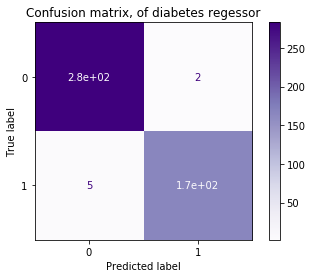

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


# Plot a confusion matrix
title = "Confusion matrix, of diabetes regessor"
disp = plot_confusion_matrix(
    model, 
    X_test, y_test,
    display_labels=[0,1],
    cmap=plt.cm.Purples,
)
disp.ax_.set_title(title)
plt.show()